In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X=pd.read_csv("data limpia/X_definitiva.csv")
Y=pd.read_csv("data limpia/Y_definitiva.csv")
Y=Y["Precio"]
Z_test=pd.read_csv("data limpia/Z_test_definitiva.csv")

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(729, 15)
(183, 15)
(729,)
(183,)


Decision Tree

In [5]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [6]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [7]:
decision_tree.score(X_train, Y_train)

1.0

In [8]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [9]:
prediction_dt = decision_tree.predict(X_test)

In [10]:
print('MAE', mean_absolute_error(prediction_dt, Y_test))
print('MAPE', mean_absolute_percentage_error(prediction_dt, Y_test) * 100)
print('MSE', mean_squared_error(prediction_dt, Y_test))
print('RMSE', (mean_squared_error(prediction_dt, Y_test))**(1/2))
print('R2',  r2_score(Y_test, prediction_dt))

MAE 280.72
MAPE 26.489255075186463
MSE 178790.64992131147
RMSE 422.83643400410926
R2 0.6021795813503468


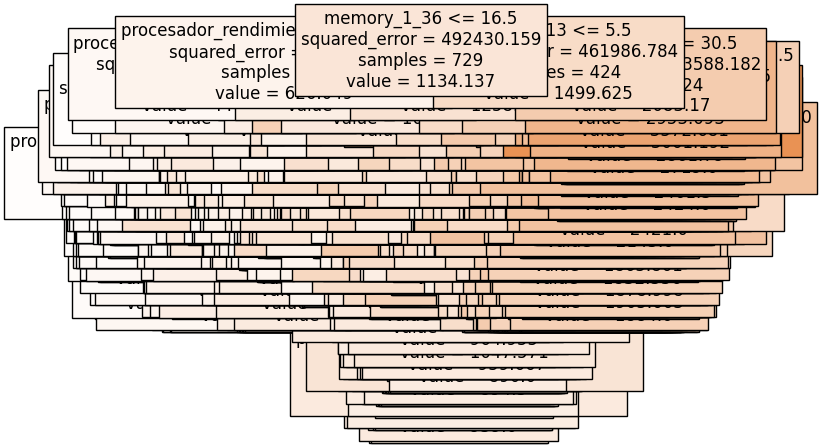

In [11]:
#plt.figure(figsize=(15,15))
plot_tree(decision_tree, fontsize=12, filled=True, feature_names= X_train.columns, class_names= 'actual');

In [12]:
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3)

In [13]:
prediction_dt = decision_tree.predict(X_test)

In [14]:
print('MAE', mean_absolute_error(prediction_dt, Y_test))
print('MAPE', mean_absolute_percentage_error(prediction_dt, Y_test) * 100)
print('MSE', mean_squared_error(prediction_dt, Y_test))
print('RMSE', (mean_squared_error(prediction_dt, Y_test))**(1/2))
print('R2',  r2_score(Y_test, prediction_dt))

MAE 315.7496617626243
MAPE 30.063472965909632
MSE 184902.9424031042
RMSE 430.0034213853469
R2 0.5885793469136684


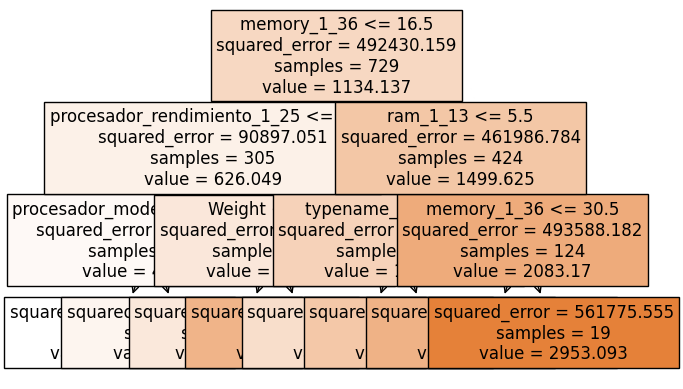

In [15]:
#plt.figure(figsize=(12,12))
plot_tree(decision_tree, fontsize=12, filled=True, feature_names= X_train.columns, class_names= 'actual');

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
from sklearn.metrics import SCORERS

In [18]:
for i in SCORERS.keys():
    print(i)

explained_variance
r2
max_error
neg_median_absolute_error
neg_mean_absolute_error
neg_mean_absolute_percentage_error
neg_mean_squared_error
neg_mean_squared_log_error
neg_root_mean_squared_error
neg_mean_poisson_deviance
neg_mean_gamma_deviance
accuracy
top_k_accuracy
roc_auc
roc_auc_ovr
roc_auc_ovo
roc_auc_ovr_weighted
roc_auc_ovo_weighted
balanced_accuracy
average_precision
neg_log_loss
neg_brier_score
adjusted_rand_score
rand_score
homogeneity_score
completeness_score
v_measure_score
mutual_info_score
adjusted_mutual_info_score
normalized_mutual_info_score
fowlkes_mallows_score
precision
precision_macro
precision_micro
precision_samples
precision_weighted
recall
recall_macro
recall_micro
recall_samples
recall_weighted
f1
f1_macro
f1_micro
f1_samples
f1_weighted
jaccard
jaccard_macro
jaccard_micro
jaccard_samples
jaccard_weighted


In [19]:
dt_reg_model_2 = DecisionTreeRegressor()

params = {'max_depth': [2, 3, 4, 5], 
          'criterion': ['squared_error', 'absolute_error'], 
          'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}


grid_search_dt_reg_model_2 = GridSearchCV(estimator=dt_reg_model_2, param_grid= params, scoring='r2', cv = 5)

In [20]:
grid_search_dt_reg_model_2.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='r2')

In [21]:
grid_search_dt_reg_model_2.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [22]:
grid_search_dt_reg_model_2.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=8)

In [23]:
dt_model_3 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=2)
dt_model_3.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=8)

In [24]:
prediction_dt = dt_model_3.predict(X_test)

In [25]:
print('MAE', mean_absolute_error(prediction_dt, Y_test))
print('MAPE', mean_absolute_percentage_error(prediction_dt, Y_test) * 100)
print('MSE', mean_squared_error(prediction_dt, Y_test))
print('RMSE', (mean_squared_error(prediction_dt, Y_test))**(1/2))
print('R2',  r2_score(Y_test, prediction_dt))

MAE 269.077936445167
MAPE 24.96490102373465
MSE 148958.47233922765
RMSE 385.9513859791511
R2 0.6685580490171884


In [26]:
prediction_dt_model = dt_model_3.predict(Z_test)

In [27]:
diccionario = {'id': Z_test['id'], 'Price_euros': np.array(prediction_dt_model)}


entrega_dt_model = pd.DataFrame(diccionario)


entrega_dt_model

,id,Price_euros
0,824,1585.301875
1,101,493.841194
2,1157,1585.301875
3,940,1233.108750
4,853,1233.108750
...,...,...
386,292,767.284074
387,688,971.119286
388,910,1503.337857
389,54,493.841194


In [ ]:
entrega_dt_model.to_csv("entrega_dt_model.csv",index=False)